In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,date
import pytz
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=1)
print("X equals")
print(X)
print(len(X[0]))
print("y equals")
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
print(X_train,y_train)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

X equals
[[ 4.35964951e-01  6.56278975e-01  4.80179809e-04 ... -2.17373330e+00
  -4.53751512e-01 -1.53885818e-01]
 [-1.04054030e+00 -2.19631333e-03  1.41229617e+00 ... -1.24838837e+00
   3.09657106e-01  7.13107100e-01]
 [-6.28817482e-01 -4.36684080e-01  1.49088673e-01 ...  1.16895233e+00
  -9.38234025e-03 -1.40959504e+00]
 ...
 [ 1.58814951e+00  6.05600808e-01 -1.65709505e+00 ...  6.75282576e-01
  -8.59941103e-01  1.03056340e+00]
 [-8.57014517e-01  1.21629894e+00  9.70696111e-01 ...  1.47511687e+00
   1.21356892e+00 -9.84514530e-01]
 [-2.45389193e+00 -1.43403073e+00  5.40533161e-01 ...  9.52547818e-01
   5.49421827e-01  2.07229946e-01]]
100
y equals
[-3.85217603e+01  1.12467601e+02 -3.44345090e+02  1.82630283e+02
  2.39473441e+02 -5.29145377e+01 -1.90797752e+01  1.48663488e+02
  9.59532286e+01 -2.08045947e+01 -4.99385124e+01  9.97128986e+01
 -1.04668089e+02  1.89481810e+02 -2.16615457e+02 -2.17710850e+02
 -1.63052960e+02  1.71269972e+02  1.98236402e+02 -1.33636109e+02
  1.03148910e+02 

/Users/devieira/miniconda3/envs/trading/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4162338898076595

In [3]:
def get_stock_data(ticker,start,end):
    start_date = date.fromisoformat(start)
    end_date = date.fromisoformat(end)
    start_stamp = int(datetime(start_date.year, start_date.month, start_date.day, tzinfo=pytz.UTC).timestamp())
    end_stamp = int(datetime(end_date.year, end_date.month, end_date.day, tzinfo=pytz.UTC).timestamp())
    print(start_date, end_date)
    #start_stamp = datetime.timestamp(start_date)
    #end_stamp = datetime.timestamp(end_date)
    print(start_stamp,end_stamp)
    url = "https://query1.finance.yahoo.com/v7/finance/download/%s?period1=%i&period2=%i&interval=1d&events=history&includeAdjustedClose=true" % (ticker,start_stamp, end_stamp)
    print(url)
    stock = pd.read_csv(url)
    print(stock)
    # Create a MinMaxScaler object

    scaler = MinMaxScaler()
    # Define the column to leave unchanged
    unchanged_column = 'Date'

    # Create a subset of columns excluding the unchanged column
    columns_to_scale = [col for col in stock.columns if col != unchanged_column]

    # Copy the DataFrame
    stock_normalized = stock.copy()

    # Apply MinMaxScaler to the subset of columns
    stock_normalized[columns_to_scale] = scaler.fit_transform(stock[columns_to_scale])

    print(stock_normalized)
    
    # Concatenate the normalized subset with the unchanged column
    stock_normalized = pd.concat([stock_normalized[unchanged_column], stock_normalized[columns_to_scale]], axis=1)
    return stock_normalized



In [4]:
Itau = get_stock_data("ITUB4.SA","2021-01-01","2021-12-31")
Vale = get_stock_data("VALE3.SA","2021-01-01","2021-12-31")
Itau.merge(Vale)
print(Itau)
print(type(Itau)) 
df = result = pd.concat([Vale, Itau], axis=1, keys=['Vale', 'Itau'])
print(df)

2021-01-01 2021-12-31
1609459200 1640908800
https://query1.finance.yahoo.com/v7/finance/download/ITUB4.SA?period1=1609459200&period2=1640908800&interval=1d&events=history&includeAdjustedClose=true
           Date       Open       High        Low      Close  Adj Close  \
0    2021-01-04  31.980000  31.990000  30.840000  30.900000  26.280027   
1    2021-01-05  30.730000  31.059999  30.170000  30.700001  26.109945   
2    2021-01-06  30.980000  32.060001  30.790001  31.600000  26.875380   
3    2021-01-07  31.650000  33.060001  31.500000  32.830002  27.921476   
4    2021-01-08  32.930000  33.439999  32.430000  32.820000  27.912970   
..          ...        ...        ...        ...        ...        ...   
242  2021-12-23  21.330000  21.570000  21.170000  21.340000  18.787285   
243  2021-12-27  21.480000  21.700001  21.309999  21.559999  18.980965   
244  2021-12-28  21.629999  21.700001  21.400000  21.480000  18.910536   
245  2021-12-29  21.530001  21.580000  21.230000  21.299999  18

In [5]:
print(df.xs("Adj Close",axis=1,level=1))
train_mask = (df["Vale"]["Date"] > "2021-01-01") &  (df["Vale"]["Date"] < "2021-07-01")
Train_Data = Itau[train_mask]
print(Train_Data["Adj Close"])
print(type(Train_Data["Adj Close"]))
test_mask = (df["Vale"]["Date"] >= "2021-07-01") & (df["Vale"]["Date"] <= "2021-12-31")

Test_Data=Itau[test_mask]
print(Test_Data["Adj Close"])

         Vale      Itau
0    0.350917  0.759611
1    0.380716  0.743123
2    0.439732  0.817323
3    0.561053  0.918728
4    0.554861  0.917904
..        ...       ...
242  0.382866  0.033284
243  0.378314  0.052058
244  0.335065  0.045231
245  0.339617  0.029869
246  0.355779  0.000000

[247 rows x 2 columns]
0      0.759611
1      0.743123
2      0.817323
3      0.918728
4      0.917904
         ...   
117    0.876056
118    0.791472
119    0.762161
120    0.737037
121    0.707727
Name: Adj Close, Length: 122, dtype: float64
<class 'pandas.core.series.Series'>
122    0.699766
123    0.726579
124    0.692226
125    0.688036
126    0.698928
         ...   
242    0.033284
243    0.052058
244    0.045231
245    0.029869
246    0.000000
Name: Adj Close, Length: 125, dtype: float64


In [6]:
rwin = 10
Sample_Array = []
Result_Array = []
scaler = MinMaxScaler()
Test_Sample_Array = []
Test_Result_Array = []

columns = ["Close","Adj Close"]
Normalized_Train_Data = Train_Data.copy() 
Normalized_Test_Data = Test_Data.copy()

for i in range(0,len(Train_Data["Close"])-rwin):
    Sample = Normalized_Train_Data["Close"].iloc[i:i+rwin]
    Sample_Array.append(Sample)
    Result = Normalized_Train_Data["Close"].iloc[i+rwin]
    Result_Array.append(Result)
for i in range(0,len(Test_Data["Close"])-rwin):
    Test_Sample = Normalized_Test_Data["Close"].iloc[i:i+rwin]
    Test_Sample_Array.append(Test_Sample)
    Test_Result = Normalized_Test_Data["Close"].iloc[i+rwin]
    Test_Result_Array.append(Test_Result)
print(Sample_Array)
print(Result_Array)
print(Test_Sample_Array)
print(Test_Result_Array)

[0    0.806321
1    0.790113
2    0.863047
3    0.962723
4    0.961912
5    0.901945
6    0.910049
7    0.867099
8    0.943274
9    0.843598
Name: Close, dtype: float64, 1     0.790113
2     0.863047
3     0.962723
4     0.961912
5     0.901945
6     0.910049
7     0.867099
8     0.943274
9     0.843598
10    0.830632
Name: Close, dtype: float64, 2     0.863047
3     0.962723
4     0.961912
5     0.901945
6     0.910049
7     0.867099
8     0.943274
9     0.843598
10    0.830632
11    0.800648
Name: Close, dtype: float64, 3     0.962723
4     0.961912
5     0.901945
6     0.910049
7     0.867099
8     0.943274
9     0.843598
10    0.830632
11    0.800648
12    0.759319
Name: Close, dtype: float64, 4     0.961912
5     0.901945
6     0.910049
7     0.867099
8     0.943274
9     0.843598
10    0.830632
11    0.800648
12    0.759319
13    0.726094
Name: Close, dtype: float64, 5     0.901945
6     0.910049
7     0.867099
8     0.943274
9     0.843598
10    0.830632
11    0.800648
12    0.7

In [7]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(Sample_Array, Result_Array)
Res = pd.DataFrame({"Prediction":regr.predict(Test_Sample_Array[:])})
New_index_values = range(132, 247)
Res.index = New_index_values
print(Res)

     Prediction
132    0.772516
133    0.750994
134    0.745239
135    0.740412
136    0.728000
..          ...
242    0.353301
243    0.345331
244    0.353630
245    0.355699
246    0.365596

[115 rows x 1 columns]


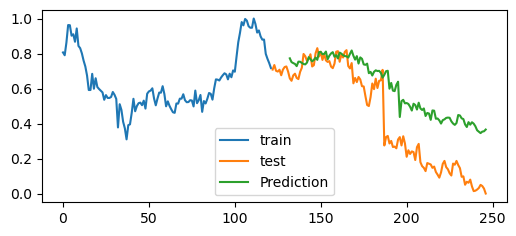

In [8]:
fig, ax = plt.subplots(figsize=(6, 2.5))
Normalized_Train_Data['Close'].plot(ax=ax, label='train')
Normalized_Test_Data['Close'].plot(ax=ax, label='test')
Res.plot(ax=ax,label="Prediction")
ax.legend();

In [9]:
class TechnicalIndicators():
    def __init__(self, data_frame):
        self.df = data_frame.copy()

    def momentum(self, n, offset=0):
        if f'momentum_{n}' not in self.df.columns:
            close_prices = self.df['Close'].iloc[offset:]
            momentum = close_prices / close_prices.shift(n) - 1
            self.df[f'momentum_{n}'] = momentum
        return self.df[f'momentum_{n}']

    def simple_movement_average(self, n, offset=0):
        if f'sma_{n}' not in self.df.columns:
            window_mean = self.df['Close'].iloc[offset:].rolling(n).mean()
            self.df[f'sma_{n}'] = self.df['Close'] / window_mean - 1
        return self.df[f'sma_{n}']

    def _get_bollinger_bands(self, rm, rstd):
        upper_band = rm + rstd * 2
        lower_band = rm - rstd * 2
        return upper_band, lower_band

    def bollinger_bands(self, window_size=20, offset=0):
        if 'upper_band' not in self.df.columns:
            self.df['mm20'] = self.df['Close'].iloc[offset:].rolling(window_size).mean()
            rstd = self.df['Close'].iloc[offset:].rolling(window_size).std()
            self.df['upper_band'], self.df['lower_band'] = self._get_bollinger_bands(self.df['mm20'], rstd)
        return self.df[['Close', 'mm20', 'upper_band', 'lower_band']]

    def add_daily_return(self):
        self.df['daily_return'] = (self.df['Close'] / self.df['Close'].shift(1)) - 1
        self.df.loc['daily_return',0:1] = 0
        self.df['cumulative_return'] = (self.df['Close'] / self.df['Close'].values[0]) - 1
        self.df.loc['cumulative_return',0:1] = 0

In [10]:
TF = TechnicalIndicators(Itau)
print(TF.df)
print(type(TF.df))
print(TF.momentum(15))
print(TF.simple_movement_average(15))
print(TF.bollinger_bands(15))
print(TF.add_daily_return())
print(TF.df)

           Date      Open      High       Low     Close  Adj Close    Volume
0    2021-01-04  0.865277  0.819647  0.826811  0.806321   0.759611  0.192760
1    2021-01-05  0.765036  0.748273  0.771024  0.790113   0.743123  0.161606
2    2021-01-06  0.785084  0.825019  0.822648  0.863047   0.817323  0.310556
3    2021-01-07  0.838813  0.901765  0.881765  0.962723   0.918728  0.341407
4    2021-01-08  0.941459  0.930929  0.959201  0.961912   0.917904  0.405792
..          ...       ...       ...       ...       ...        ...       ...
242  2021-12-23  0.011227  0.019954  0.021649  0.031604   0.033284  0.102550
243  2021-12-27  0.023256  0.029931  0.033306  0.049433   0.052058  0.018570
244  2021-12-28  0.035285  0.029931  0.040799  0.042950   0.045231  0.031325
245  2021-12-29  0.027265  0.020721  0.026644  0.028363   0.029869  0.006808
246  2021-12-30  0.020048  0.009977  0.003331  0.000000   0.000000  0.279739

[247 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
0           Na

TypeError: Slicing a positional slice with .loc is not allowed, Use .loc with labels or .iloc with positions instead.

In [ ]:
Train = Itaú